In [3]:
# !mamba install bs4==4.10.0 -y
!pip install lxml==4.6.4
# !mamba install html5lib==1.1 -y
!pip install requests==2.27.1


  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0


ERROR: botframework-connector 4.13.0 has requirement requests<2.26,>=2.23.0, but you'll have requests 2.27.1 which is incompatible.


In [4]:
from bs4 import BeautifulSoup
import requests

In [15]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>My Page</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p>Salary: £92,000,000 </p>
<h3>Stephen Curry</h3>
<p>Salary: £85,000,000 </p>
<h3>Giannis Antentokounmpo</h3>
<p>Salary: £72,000,000 </p>
</body>
</html>

In [16]:
html="<!DOCTYPE html><html><head><title>My Page</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p>Salary: £92,000,000 </p><h3>Stephen Curry</h3><p>Salary: £85,000,000 </p><h3>Giannis Antentokounmpo</h3><p>Salary: £72,000,000 </p></body></html>"

In [17]:
soup = BeautifulSoup(html, "html.parser")

First, the document is converted to Unicode, (similar to ASCII),  and HTML entities are converted to Unicode characters. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. The <code>BeautifulSoup</code> object can create other types of objects. In this lab, we will cover <code>BeautifulSoup</code> and <code>Tag</code> objects that for the purposes of this lab are identical, and <code>NavigableString</code> objects.


In [18]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   My Page
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: £92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: £85,000,000
  </p>
  <h3>
   Giannis Antentokounmpo
  </h3>
  <p>
   Salary: £72,000,000
  </p>
 </body>
</html>


In [19]:
tag_object = soup.title
print("Tag object: ", tag_object)

Tag object:  <title>My Page</title>


In [20]:
print("Tag object type: ", type(tag_object))

Tag object type:  <class 'bs4.element.Tag'>


In [21]:
tag_object = soup.h3
print(tag_object)

<h3><b id="boldest">Lebron James</b></h3>


In [23]:
tag_child = tag_object.b
tag_child

<b id="boldest">Lebron James</b>

In [24]:
parent_tag = tag_child.parent
parent_tag


<h3><b id="boldest">Lebron James</b></h3>

In [25]:
sibling_1 = tag_object.next_sibling
sibling_1

<p>Salary: £92,000,000 </p>

In [26]:
sibling_2 = sibling_1.next_sibling
sibling_2

<h3>Stephen Curry</h3>

In [27]:
sibling_2.next_sibling

<p>Salary: £85,000,000 </p>

In [28]:
tag_child['id']

'boldest'

In [29]:
tag_child.attrs

{'id': 'boldest'}

In [30]:
tag_child.get('id')

'boldest'

In [33]:
tag_string = tag_child.string
tag_string

'Lebron James'

In [34]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

In [35]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


In [42]:
html="<table><tr><td id='flight' >Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [43]:
table_bs = BeautifulSoup(html, "html.parser")

In [44]:
table_rows = table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>]

In [46]:
first_row = table_rows[0]

In [47]:
print(type(first_row))

<class 'bs4.element.Tag'>


In [50]:
print(first_row.td)

<td id="flight">Flight No</td>


In [52]:
for i,row in enumerate(table_rows):
    print("row" , i , "is" , row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>


In [53]:
for i,row in enumerate(table_rows):
    print("row", i)
    cells = row.find_all('td')
    for(j, cell) in enumerate(cells):
        print('Column' ,j,"cell",cell)

row 0
Column 0 cell <td id="flight">Flight No</td>
Column 1 cell <td>Launch site</td>
Column 2 cell <td>Payload mass</td>
row 1
Column 0 cell <td>1</td>
Column 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>
Column 2 cell <td>300 kg</td>
row 2
Column 0 cell <td>2</td>
Column 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
Column 2 cell <td>94 kg</td>
row 3
Column 0 cell <td>3</td>
Column 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>
Column 2 cell <td>80 kg</td>


In [55]:
list_input = table_bs.find_all(['tr', 'td'])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>,
 <td>80 kg</td>]

In [56]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

In [58]:
list_input = table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

In [60]:
list_input = table_bs.find_all(href=True)
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

In [61]:
table_bs.find_all(string="Florida")

['Florida', 'Florida']

In [63]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


In [64]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

In [66]:
two_tables_bs = BeautifulSoup(two_tables, "html.parser")

In [67]:
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

In [68]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

In [69]:
url = "http://www.ibm.com"

In [70]:
data = requests.get(url).text

In [71]:
soup = BeautifulSoup(data,"html.parser")

In [73]:
for link in soup.find_all('a', href=True):
    print(link.get('href'))

https://www.ibm.com/uk/en
https://www.ibm.com/lets-create/uk-en?lnk=hpmlc

https://www.ibm.com/uk-en/products?lnk=hpmps_bupr_uken&lnk2=link
https://www.ibm.com/uk-en/industries?lnk=hpmps_buin_uken&lnk2=link
https://www.ibm.com/uk-en/watson?lnk=hpmps_bues_uken&lnk2=learn
https://www.ibm.com/uk-en/cloud/automation?lnk=hpmps_buau_uken&lnk2=link
https://www.ibm.com/uk-en/blockchain?lnk=hpmps_bubc_uken&lnk2=link
https://www.ibm.com/uk-en/business-operations?lnk=hpmps_buop_uken&lnk2=link
https://www.ibm.com/uk-en/cloud?lnk=hpmps_bucl_uken&lnk2=link
https://www.ibm.com/uk-en/analytics?lnk=hpmps_buda_uken&lnk2=link
https://www.ibm.com/uk-en/it-infrastructure?lnk=hpmps_buit_uken&lnk2=link
https://www.ibm.com/uk-en/security?lnk=hpmps_buse_uken&lnk2=link
https://www.ibm.com/uk-en/supply-chain?lnk=hpmps_bufi_uken&lnk2=link
https://www.ibm.com/uk-en/financing?lnk=hpmps_bufi_uken&lnk2=link
https://www.ibm.com/uk-en/products?lnk=hpmps_buall_uken&lnk2=link

https://www.ibm.com/consulting/uk-en/?lnk=hp

In [74]:
for link in soup.find_all('img'):
    print(link)
    print(link.get('src'))

<img alt="ibm i for power systems" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-05-03/ibm%20i.jpg"/>
//1.cms.s81c.com/sites/default/files/2022-05-03/ibm%20i.jpg
<img alt="" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-05-30/Secure.jpg"/>
//1.cms.s81c.com/sites/default/files/2022-05-30/Secure.jpg
<img alt="" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-05-31/Modernize.jpg"/>
//1.cms.s81c.com/sites/default/files/2022-05-31/Modernize.jpg
<img alt="" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-05-31/Datafabric.jpg"/>
//1.cms.s81c.com/sites/default/files/2022-05-31/Datafabric.jpg
<img alt="" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-05-30/Automation.jpg"/>
//1.cms.s81c.com/sites/default/files/2022-05-30/Automation.jpg
<img alt="" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-05-31/Consulting_0.jpg"/>
//1.cms.s81c.com/sites/default/fil

In [79]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

In [80]:
data = requests.get(url).text

In [81]:
soup = BeautifulSoup(data, "html.parser")

In [83]:
table = soup.find('table')

In [84]:
for row in table.find_all('tr'):
     # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


In [85]:
import pandas as pd

In [86]:
url = "https://en.wikipedia.org/wiki/World_population"

In [90]:
data = requests.get(url).text
soup = BeautifulSoup(data,"html.parser")
tables = soup.find_all('table')
len(tables)

26

In [97]:
for index, table in enumerate(tables):
    if "10 most densely populated countries" in str(table):
        table_index = index
print(table_index)

5


In [98]:
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
 </caption>
 <tbody>
  <tr>
   <th>
    Rank
   </th>
   <th>
    Country
   </th>
   <th>
    Population
   </th>
   <th>
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th>
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/23px-Flag_of_Singapore.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/35px-Flag_of_Singapore.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapo

In [100]:
population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all('td')
    if(col != []):
        rank = col[0].text
        country = col[1].text
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        population_data = population_data.append({"Rank":rank, "Country":country, "Population":population, "Area":area, "Density":density}, ignore_index=True)
population_data

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,704,000",710,"8,033"
1,2,Bangladesh,"172,840,000","143,998","1,200"
2,3,\n Palestine\n\n,"5,266,785","6,020",847
3,4,Lebanon,"6,856,000","10,452",656
4,5,Taiwan,"23,604,000","36,193",652
5,6,South Korea,"51,781,000","99,538",520
6,7,Rwanda,"12,374,000","26,338",470
7,8,Haiti,"11,578,000","27,065",428
8,9,Netherlands,"17,730,000","41,526",427
9,10,Israel,"9,530,000","22,072",432


In [101]:
pd.read_html(str(tables[5]),flavor='bs4')

[   Rank      Country  Population  Area(km2)  Density(pop/km2)
 0     1    Singapore     5704000        710              8033
 1     2   Bangladesh   172840000     143998              1200
 2     3    Palestine     5266785       6020               847
 3     4      Lebanon     6856000      10452               656
 4     5       Taiwan    23604000      36193               652
 5     6  South Korea    51781000      99538               520
 6     7       Rwanda    12374000      26338               470
 7     8        Haiti    11578000      27065               428
 8     9  Netherlands    17730000      41526               427
 9    10       Israel     9530000      22072               432]

In [104]:
population_data_read_html = pd.read_html(str(tables[5]),flavor='bs4')[0]
population_data_read_html

,Rank,Country,Population,Area(km2),Density(pop/km2)
0,1,Singapore,5704000,710,8033
1,2,Bangladesh,172840000,143998,1200
2,3,Palestine,5266785,6020,847
3,4,Lebanon,6856000,10452,656
4,5,Taiwan,23604000,36193,652
5,6,South Korea,51781000,99538,520
6,7,Rwanda,12374000,26338,470
7,8,Haiti,11578000,27065,428
8,9,Netherlands,17730000,41526,427
9,10,Israel,9530000,22072,432


In [105]:
dataframe_list = pd.read_html(url, flavor='bs4')

In [106]:
len(dataframe_list)

26

In [107]:
dataframe_list[5]

,Rank,Country,Population,Area(km2),Density(pop/km2)
0,1,Singapore,5704000,710,8033
1,2,Bangladesh,172840000,143998,1200
2,3,Palestine,5266785,6020,847
3,4,Lebanon,6856000,10452,656
4,5,Taiwan,23604000,36193,652
5,6,South Korea,51781000,99538,520
6,7,Rwanda,12374000,26338,470
7,8,Haiti,11578000,27065,428
8,9,Netherlands,17730000,41526,427
9,10,Israel,9530000,22072,432


In [108]:
pd.read_html(url, match="10 most densely populated countries", flavor='bs4')[0]

,Rank,Country,Population,Area(km2),Density(pop/km2)
0,1,Singapore,5704000,710,8033
1,2,Bangladesh,172840000,143998,1200
2,3,Palestine,5266785,6020,847
3,4,Lebanon,6856000,10452,656
4,5,Taiwan,23604000,36193,652
5,6,South Korea,51781000,99538,520
6,7,Rwanda,12374000,26338,470
7,8,Haiti,11578000,27065,428
8,9,Netherlands,17730000,41526,427
9,10,Israel,9530000,22072,432


In [1]:
!pip install yfinance==0.1.67

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8493 sha256=c79ca735b41075f8f6e3891bca21d6edb0432a7e8c5d7e12d4ced48d5f393654
  Stored in directory: c:\users\darshan\appdata\local\pip\cache\wheels\34\ba\79\c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


In [3]:
!pip install yfinance==0.1.70

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.1.67
    Uninstalling yfinance-0.1.67:
      Successfully uninstalled yfinance-0.1.67


In [4]:
import yfinance as yf
import pandas as pd

In [5]:
apple = yf.Ticker("AAPL")

In [6]:
apple_info = apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [7]:
apple_info['country']

'United States'

Extracting the share price: 

In [8]:
apple_share_price_data = apple.history(period="max")

In [9]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0
1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0
1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0


In [10]:
apple_share_price_data.reset_index(inplace=True)

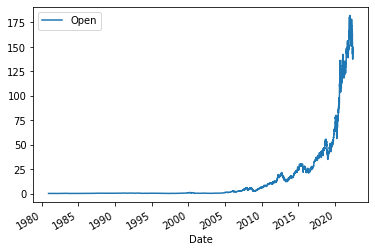

In [12]:
apple_share_price_data.plot(x="Date", y="Open")

# Extracting Dividends

In [13]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
2022-05-06    0.230000
Name: Dividends, Length: 75, dtype: float64

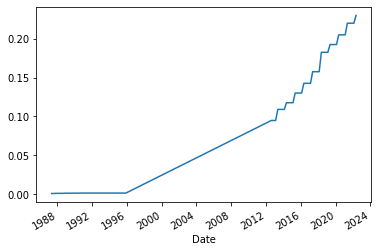

In [14]:
apple.dividends.plot()

In [15]:
amd = yf.Ticker("AMD")
amd

yfinance.Ticker object <AMD>

In [16]:
amd_info = amd.info

In [17]:
amd_info['country']

'United States'

In [18]:
amd_info['sector']

'Technology'

In [19]:
amd_share_price_data = amd.history(period = "max")
amd_share_price_data.head(1)['Volume']

Date
1980-03-17    219600
Name: Volume, dtype: int64

In [20]:
!pip install lxml==4.6.4
!pip install requests
!pip install pandas
!pip install plotly

In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data = requests.get(url).text

In [23]:
soup = BeautifulSoup(data, "html5lib")

In [24]:
netflix_data = pd.DataFrame(columns=['Date','Open','High','Low','Close','Volume'])`

In [25]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    netflix_data= netflix_data.append({"Date" : date, "Open": Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [26]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [29]:
read_html_pandas_data = pd.read_html(url)
read_html_pandas_data

[                                                 Date  \
 0                                        Jun 01, 2021   
 1                                        May 01, 2021   
 2                                        Apr 01, 2021   
 3                                        Mar 01, 2021   
 4                                        Feb 01, 2021   
 ..                                                ...   
 66                                       Dec 01, 2015   
 67                                       Nov 01, 2015   
 68                                       Oct 01, 2015   
 69                                       Sep 01, 2015   
 70  *Close price adjusted for splits.**Adjusted cl...   
 
                                                  Open  \
 0                                              504.01   
 1                                              512.65   
 2                                              529.93   
 3                                              545.57   
 4          

In [30]:
read_html_pandas_data = pd.read_html(str(soup))
read_html_pandas_data

[                                                 Date  \
 0                                        Jun 01, 2021   
 1                                        May 01, 2021   
 2                                        Apr 01, 2021   
 3                                        Mar 01, 2021   
 4                                        Feb 01, 2021   
 ..                                                ...   
 66                                       Dec 01, 2015   
 67                                       Nov 01, 2015   
 68                                       Oct 01, 2015   
 69                                       Sep 01, 2015   
 70  *Close price adjusted for splits.**Adjusted cl...   
 
                                                  Open  \
 0                                              504.01   
 1                                              512.65   
 2                                              529.93   
 3                                              545.57   
 4          

In [31]:
netflix_dataframe = read_html_pandas_data[0]
netflix_dataframe

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300
...,...,...,...,...,...,...,...
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,114.38,319939200
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,123.33,320321800
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,108.38,446204400
69,"Sep 01, 2015",109.35,111.24,93.55,103.26,103.26,497401200


In [1]:
!pip install yfinance==0.1.67
!pip install pandas==1.3.3
!pip install requests
!pip install plotly

  Using cached yfinance-0.1.67-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.1.70
    Uninstalling yfinance-0.1.70:
      Successfully uninstalled yfinance-0.1.70
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()